In [2]:
import sklearn.neighbors as neighbors
import sklearn.model_selection
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784') 

['9']


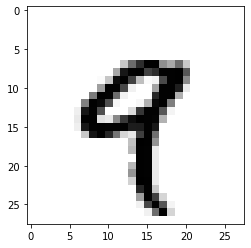

Score de l'échantillon de test : 0.917


In [13]:
data=np.random.randint(70000, size=5000)
trainsize=0.8
nb_neighbors=10
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
train_size=trainsize)
## Entrainement avec k =10
clf = neighbors.KNeighborsClassifier(nb_neighbors)
clf.fit(xtrain,ytrain)
## Affichage de l'image 4 et de la classe prédite (9)
print(clf.predict([mnist.data[4]]))
images = mnist.data.reshape((-1, 28, 28)) 
plt.imshow(images[4],cmap=plt.cm.gray_r,interpolation="nearest") 
plt.show() 
## Affichage du score de l'échantillon de test
print("Score de l'échantillon de test : "+str(clf.score(xtest,ytest)))


Redo n°0 : 
With k=2 -> score= 0.911
With k=3 -> score= 0.927
With k=4 -> score= 0.929
With k=5 -> score= 0.933
With k=6 -> score= 0.933
With k=7 -> score= 0.924
With k=8 -> score= 0.923
With k=9 -> score= 0.922
With k=10 -> score= 0.924
With k=11 -> score= 0.919
With k=12 -> score= 0.926
With k=13 -> score= 0.921
With k=14 -> score= 0.92
With k=15 -> score= 0.921
Redo n°1 : 
With k=2 -> score= 0.922
With k=3 -> score= 0.937
With k=4 -> score= 0.931
With k=5 -> score= 0.938
With k=6 -> score= 0.93
With k=7 -> score= 0.93
With k=8 -> score= 0.927
With k=9 -> score= 0.928
With k=10 -> score= 0.922
With k=11 -> score= 0.922
With k=12 -> score= 0.916
With k=13 -> score= 0.921
With k=14 -> score= 0.917
With k=15 -> score= 0.913
Redo n°2 : 
With k=2 -> score= 0.917
With k=3 -> score= 0.92
With k=4 -> score= 0.933
With k=5 -> score= 0.931
With k=6 -> score= 0.932
With k=7 -> score= 0.93
With k=8 -> score= 0.93
With k=9 -> score= 0.931
With k=10 -> score= 0.927
With k=11 -> score= 0.924
With k

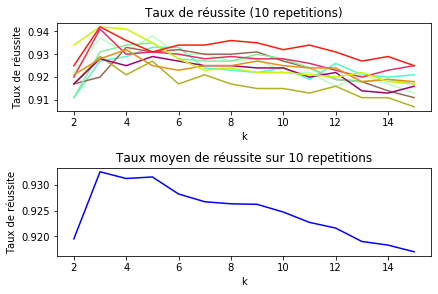

In [36]:
### varier le nombre de voisins 
nb_redo=10
score=[]
plt.subplot(2, 1, 1)
for a in range(0,nb_redo):
    tempscore=[]
    data=np.random.randint(70000, size=5000)
    trainsize=0.8
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
    train_size=trainsize)
    print("Redo n°"+str(a)+" : ")
    for k in range(2,16):
        clf = neighbors.KNeighborsClassifier(k,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        kscore=clf.score(xtest, ytest)
        print("With k="+str(k)+" -> score="+str(kscore))
        tempscore.append(kscore)
    score.append(tempscore)
    plt.plot(range(2,16),tempscore,c=np.random.rand(3,))
plt.title("Taux de réussite ("+str(nb_redo)+" repetitions)")
plt.xlabel("Nombre de voisins k")
plt.ylabel("Taux de réussite")
plt.subplot(2, 1, 2)
meanscore=[0]*len(range(2,16))
for i in range(len(score)):
    for j in range(len(score[0])):
        meanscore[j]+=score[i][j]
meanscore = [x / nb_redo for x in meanscore]
plt.plot(range(2,16),meanscore,c='b')
plt.title("Taux moyen de réussite sur "+str(nb_redo)+" repetitions")
plt.xlabel("Nombre de voisins k")
plt.ylabel("Taux de réussite")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Redo n°0 : 
With 10% training data -> score=0.8002222222222222
With 15% training data -> score=0.8449411764705882
With 20% training data -> score=0.8555
With 25% training data -> score=0.8752
With 30% training data -> score=0.8805714285714286
With 35% training data -> score=0.8846153846153846
With 40% training data -> score=0.9023333333333333
With 45% training data -> score=0.9134545454545454
With 50% training data -> score=0.9156
With 55% training data -> score=0.9013333333333333
With 60% training data -> score=0.911
With 65% training data -> score=0.9137142857142857
With 70% training data -> score=0.926
With 75% training data -> score=0.928
With 80% training data -> score=0.924
With 85% training data -> score=0.924
With 90% training data -> score=0.926
With 95% training data -> score=0.916
Redo n°1 : 
With 10% training data -> score=0.824
With 15% training data -> score=0.8310588235294117
With 20% training data -> score=0.86275
With 25% training data -> score=0.8733333333333333
With 

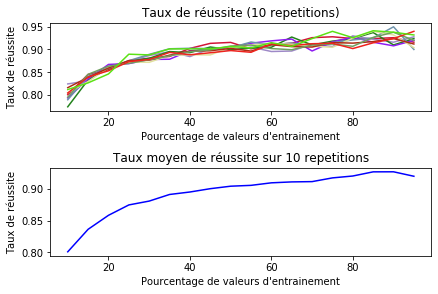

In [44]:
### varier le pourcentage de test/entrainement dans les échantillons 
nb_redo=10
score=[]
plt.subplot(2, 1, 1)
for a in range(0,nb_redo):
    tempscore=[]
    data=np.random.randint(70000, size=5000)
    print("Redo n°"+str(a)+" : ")
    for i in range(10,100,5):
        xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
        train_size=i/100)
        clf = neighbors.KNeighborsClassifier(10,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        percentscore=clf.score(xtest, ytest)
        print("With "+str(i)+"% training data -> score="+str(percentscore))
        tempscore.append(percentscore)
    score.append(tempscore)
    plt.plot(range(10,100,5),tempscore,c=np.random.rand(3,))
plt.title("Taux de réussite ("+str(nb_redo)+" repetitions)")
plt.xlabel("Pourcentage de valeurs d'entrainement")
plt.ylabel("Taux de réussite")
plt.subplot(2, 1, 2)
meanscore=[0]*len(range(10,100,5))
for i in range(len(score)):
    for j in range(len(score[0])):
        meanscore[j]+=score[i][j]
meanscore = [x / nb_redo for x in meanscore]
plt.plot(range(10,100,5),meanscore,c='b')
plt.title("Taux moyen de réussite sur "+str(nb_redo)+" repetitions")
plt.xlabel("Pourcentage de valeurs d'entrainement")
plt.ylabel("Taux de réussite")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

Redo n°0 : 
With 500 data -> score=0.73
With 1000 data -> score=0.825
With 1500 data -> score=0.83
With 2000 data -> score=0.8925
With 2500 data -> score=0.874
With 3000 data -> score=0.9083333333333333
With 3500 data -> score=0.8914285714285715
With 4000 data -> score=0.93125
With 4500 data -> score=0.9244444444444444
With 5000 data -> score=0.917
With 5500 data -> score=0.9336363636363636
With 6000 data -> score=0.9275
With 6500 data -> score=0.9246153846153846
With 7000 data -> score=0.9235714285714286
With 7500 data -> score=0.9506666666666667
With 8000 data -> score=0.93125
With 8500 data -> score=0.9176470588235294
With 9000 data -> score=0.9344444444444444
With 9500 data -> score=0.9273684210526316
With 10000 data -> score=0.933
With 10500 data -> score=0.9361904761904762
With 11000 data -> score=0.9377272727272727
With 11500 data -> score=0.9356521739130435
With 12000 data -> score=0.9295833333333333
With 12500 data -> score=0.9444
With 13000 data -> score=0.945
With 13500 data

With 6500 data -> score=0.933076923076923
With 7000 data -> score=0.925
With 7500 data -> score=0.9273333333333333
With 8000 data -> score=0.920625
With 8500 data -> score=0.9323529411764706
With 9000 data -> score=0.9405555555555556
With 9500 data -> score=0.9315789473684211
With 10000 data -> score=0.9315
With 10500 data -> score=0.9357142857142857
With 11000 data -> score=0.94
With 11500 data -> score=0.9404347826086956
With 12000 data -> score=0.945
With 12500 data -> score=0.9332
With 13000 data -> score=0.9461538461538461
With 13500 data -> score=0.9422222222222222
With 14000 data -> score=0.9460714285714286
With 14500 data -> score=0.9355172413793104
Redo n°8 : 
With 500 data -> score=0.78
With 1000 data -> score=0.865
With 1500 data -> score=0.8866666666666667
With 2000 data -> score=0.88
With 2500 data -> score=0.908
With 3000 data -> score=0.885
With 3500 data -> score=0.9014285714285715
With 4000 data -> score=0.91125
With 4500 data -> score=0.8955555555555555
With 5000 data

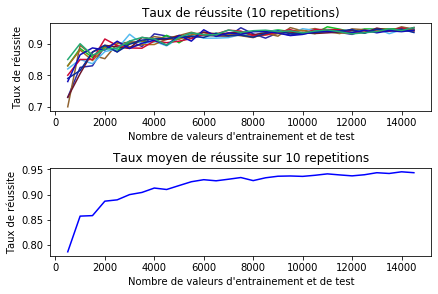

In [47]:
### varier la taille de l’échantillon
nb_redo=10
score=[]
plt.subplot(2, 1, 1)
for a in range(0,nb_redo):
    tempscore=[]
    print("Redo n°"+str(a)+" : ")
    for size in range(500,15000,500):
        data=np.random.randint(70000, size=size)
        xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
        train_size=0.8)
        clf = neighbors.KNeighborsClassifier(10,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        sizescore=clf.score(xtest, ytest)
        print("With "+str(size)+" data -> score="+str(sizescore))
        tempscore.append(sizescore)
    score.append(tempscore)
    plt.plot(range(500,15000,500),tempscore,c=np.random.rand(3,))
plt.title("Taux de réussite ("+str(nb_redo)+" repetitions)")
plt.xlabel("Nombre de valeurs d'entrainement et de test")
plt.ylabel("Taux de réussite")
plt.subplot(2, 1, 2)
meanscore=[0]*len(range(500,15000,500))
for i in range(len(score)):
    for j in range(len(score[0])):
        meanscore[j]+=score[i][j]
meanscore = [x / nb_redo for x in meanscore]
plt.plot(range(500,15000,500),meanscore,c='b')
plt.title("Taux moyen de réussite sur "+str(nb_redo)+" repetitions")
plt.xlabel("Nombre de valeurs d'entrainement et de test")
plt.ylabel("Taux de réussite")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()
    


Redo n°0 : 
With 2 neighbors p=1 -> score=0.898
With 3 neighbors p=1 -> score=0.917
With 4 neighbors p=1 -> score=0.915
With 5 neighbors p=1 -> score=0.92
With 6 neighbors p=1 -> score=0.908
With 7 neighbors p=1 -> score=0.916
With 8 neighbors p=1 -> score=0.909
With 9 neighbors p=1 -> score=0.909
With 10 neighbors p=1 -> score=0.904
With 11 neighbors p=1 -> score=0.911
With 12 neighbors p=1 -> score=0.91
With 13 neighbors p=1 -> score=0.911
With 14 neighbors p=1 -> score=0.912
With 15 neighbors p=1 -> score=0.904
With 2 neighbors p=2 -> score=0.915
With 3 neighbors p=2 -> score=0.927
With 4 neighbors p=2 -> score=0.925
With 5 neighbors p=2 -> score=0.926
With 6 neighbors p=2 -> score=0.927
With 7 neighbors p=2 -> score=0.923
With 8 neighbors p=2 -> score=0.919
With 9 neighbors p=2 -> score=0.922
With 10 neighbors p=2 -> score=0.918
With 11 neighbors p=2 -> score=0.921
With 12 neighbors p=2 -> score=0.922
With 13 neighbors p=2 -> score=0.92
With 14 neighbors p=2 -> score=0.92
With 15 n

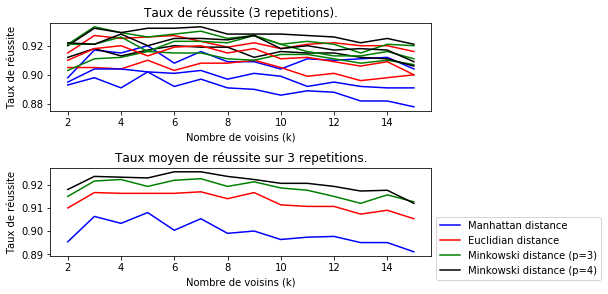

In [18]:
### varier types de distance
nb_redo=3
scorep1=[]
scorep2=[]
scorep3=[]
scorep4=[]
plt.subplot(2, 1, 1)
for a in range(0,nb_redo):
    print("Redo n°"+str(a)+" : ")
    data=np.random.randint(70000, size=5000)
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[data], mnist.target[data],
    train_size=0.8)
    tempscore=[]
    for k in range(2,16):
        clf = neighbors.KNeighborsClassifier(k,p=1,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=1 -> score="+str(distancescore))
    scorep1.append(tempscore)
    plt.plot(range(2,16),tempscore,c='b')
    tempscore=[]
    for k in range(2,16):
        clf = neighbors.KNeighborsClassifier(k,p=2,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=2 -> score="+str(distancescore))
    scorep2.append(tempscore)
    plt.plot(range(2,16),tempscore,c='r')
    tempscore=[]
    for k in range(2,16):
        clf = neighbors.KNeighborsClassifier(k,p=3,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=3 -> score="+str(distancescore))
    scorep3.append(tempscore)
    plt.plot(range(2,16),tempscore,c='g')
    tempscore=[]
    for k in range(2,16):
        clf = neighbors.KNeighborsClassifier(k,p=4,n_jobs=-1)
        clf.fit(xtrain,ytrain)
        distancescore=clf.score(xtest, ytest)
        tempscore.append(distancescore)
        print("With "+str(k)+" neighbors p=4 -> score="+str(distancescore))
    scorep4.append(tempscore)
    plt.plot(range(2,16),tempscore,c='k')
plt.title("Taux de réussite ("+str(nb_redo)+" repetitions).")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Taux de réussite")
meanscorep1=[0]*len(range(2,16))
meanscorep2=[0]*len(range(2,16))
meanscorep3=[0]*len(range(2,16))
meanscorep4=[0]*len(range(2,16))
plt.subplot(2, 1, 2)
for i in range(len(scorep1)):
    for j in range(len(scorep1[0])):
        meanscorep1[j]+=scorep1[i][j]
        meanscorep2[j]+=scorep2[i][j]
        meanscorep3[j]+=scorep3[i][j]
        meanscorep4[j]+=scorep4[i][j]
meanscorep1 = [x / nb_redo for x in meanscorep1]
meanscorep2 = [x / nb_redo for x in meanscorep2]
meanscorep3 = [x / nb_redo for x in meanscorep3]
meanscorep4 = [x / nb_redo for x in meanscorep4]
plt.plot(range(2,16),meanscorep1,c='b',label="Manhattan distance")
plt.plot(range(2,16),meanscorep2,c='r',label="Euclidian distance")
plt.plot(range(2,16),meanscorep3,c='g',label="Minkowski distance (p=3)")
plt.plot(range(2,16),meanscorep4,c='k',label="Minkowski distance (p=4)")
plt.title("Taux moyen de réussite sur "+str(nb_redo)+" repetitions.")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Taux de réussite")
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.legend(loc = 'upper left',bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
### Faire varier les n_jobs
random=np.random.randint(70000, size=5000)
trainsize=0.8
n_neighbors=10
xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(mnist.data[random], mnist.target[random],
train_size=trainsize)

In [21]:
%%time              # Affichage du temps d'éxecution de la cellule à la fin de l'éxecution
for i in range(2,16):
    clf = neighbors.KNeighborsClassifier(i,n_jobs=1)
    clf.fit(xtrain,ytrain)
    print("With 1 job"+" N="+str(i)+" --> "+str(clf.score(xtest, ytest)))

With 1 job N=2 --> 0.901
With 1 job N=3 --> 0.912
With 1 job N=4 --> 0.912
With 1 job N=5 --> 0.914
With 1 job N=6 --> 0.915
With 1 job N=7 --> 0.915
With 1 job N=8 --> 0.905
With 1 job N=9 --> 0.91
With 1 job N=10 --> 0.911
With 1 job N=11 --> 0.908
With 1 job N=12 --> 0.908
With 1 job N=13 --> 0.905
With 1 job N=14 --> 0.905
With 1 job N=15 --> 0.9
Wall time: 1min 10s


In [22]:
%%time              # Affichage du temps d'éxecution de la cellule à la fin de l'éxecution
for i in range(2,16):
    clf = neighbors.KNeighborsClassifier(i,n_jobs=-1)
    clf.fit(xtrain,ytrain)
    print("With Max Jobs"+" N="+str(i)+" --> "+str(clf.score(xtest, ytest)))

With Max Jobs N=2 --> 0.901
With Max Jobs N=3 --> 0.912
With Max Jobs N=4 --> 0.912
With Max Jobs N=5 --> 0.914
With Max Jobs N=6 --> 0.915
With Max Jobs N=7 --> 0.915
With Max Jobs N=8 --> 0.905
With Max Jobs N=9 --> 0.91
With Max Jobs N=10 --> 0.911
With Max Jobs N=11 --> 0.908
With Max Jobs N=12 --> 0.908
With Max Jobs N=13 --> 0.905
With Max Jobs N=14 --> 0.905
With Max Jobs N=15 --> 0.9
Wall time: 26.5 s
